In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load train and test sets

In [98]:
train = pd.read_csv('./raw_data/train.csv')
test = pd.read_csv('./raw_data/test.csv')

print(f'train shape: {train.shape}')
print(f'test shape: {test.shape}')

train shape: (42000, 785)
test shape: (28000, 784)


In [99]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
train.dtypes

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object

# define target and features

In [102]:
X_train = (train.drop(columns='label').values).astype('float32')
y_train = (train['label'].values).astype('int32')
X_test = test.values.astype('float32')

In [103]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [104]:
y_train

array([1, 0, 1, ..., 7, 6, 9], dtype=int32)

In [105]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

- the target is an integer from 0 to 9, which makes this a __multiclass__ classification problem

In [106]:
X_train.shape

(42000, 784)

# data visualization

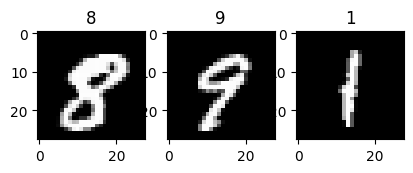

In [107]:
# convert train dataset to (num_images, img_rows, img_cols) format

X_train = X_train.reshape(X_train.shape[0], 28, 28)

for i in range(10,13):
    plt.subplot(330 + (i+1))
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.title(y_train[i])

In [108]:
# expand 1 more dimension as 1 for color channel gray

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_train.shape

(42000, 28, 28, 1)

In [109]:
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train.shape

(42000, 28, 28, 1)

# Preprocessing the digit images

## Feature Standardization

In [72]:
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)

def standardize(x):
    return (x - mean_px)/std_px

## Feature encoding

In [73]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train)

num_classes = y_train.shape[1]
num_classes

10

/home/eduardo/.pyenv/versions/3.10.6/envs/inegi/lib/python3.10/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


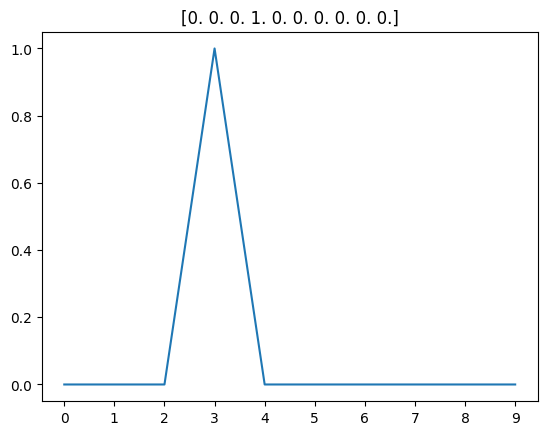

In [74]:
# plot the 10th label

plt.title(y_train[9])
plt.plot(y_train[9])
plt.xticks(range(10))
plt.show()

- the 10th label is from class 3

# Neural Network Architecture

In [75]:
# fix random seed for reproducibility

seed = 42
np.random.seed(seed)

Let's create a simple model from Keras Sequential layer:

- __lambda layer__ performs simple arithmetic operations like sum, average, exponentiation, etc. In the 1st layer of the model we have to define the input dimensions of our data in (rows, columns, color channel) format. 


- __flatten layer__ will transform input into 1D array


- __dense layer__ is the fully connected layer which means all neurons in the previous layers will be connected to all neurons in fully connected layer. In the last layer we have to specify output dimensions/classes of the model. Here it's 10, since we have to output 10 different digit labels.

In [85]:
from tensorflow.keras import Sequential, layers

model = Sequential()

model.add(layers.Lambda(standardize, input_shape=(28,28,1)))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

print(f'input shape: {model.input_shape}')
print(f'output shape: {model.output_shape}')

input shape: (None, 28, 28, 1)
output shape: (None, 10)


## Compile network

Before making network ready for training we have to make sure to add:

- a loss function: to measure how good the network is;


- an optimizer: to update the network as it sees more data and reduce loss value;


- metrics: to monitor the networks performance.

In [86]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [87]:
from tensorflow.keras.preprocessing import image

gen = image.ImageDataGenerator()

## Cross validation

In [79]:
from sklearn.model_selection import train_test_split

X = X_train
y = y_train

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=43)

In [88]:
history = model.fit(X_train, y_train, validation_data= (X_val, y_val), batch_size=16, epochs=20)

Epoch 1/20
2363/2363 [==============================] - 2s 902us/step - loss: 0.3954 - accuracy: 0.8863 - val_loss: 0.3039 - val_accuracy: 0.9110
Epoch 2/20
2363/2363 [==============================] - 2s 876us/step - loss: 0.3173 - accuracy: 0.9128 - val_loss: 0.3160 - val_accuracy: 0.9117
Epoch 3/20
2363/2363 [==============================] - 2s 877us/step - loss: 0.3055 - accuracy: 0.9174 - val_loss: 0.3407 - val_accuracy: 0.9043
Epoch 4/20
2363/2363 [==============================] - 2s 884us/step - loss: 0.3013 - accuracy: 0.9192 - val_loss: 0.3164 - val_accuracy: 0.9176
Epoch 5/20
2363/2363 [==============================] - 2s 921us/step - loss: 0.2946 - accuracy: 0.9214 - val_loss: 0.3287 - val_accuracy: 0.9102
Epoch 6/20
2363/2363 [==============================] - 2s 916us/step - loss: 0.2915 - accuracy: 0.9226 - val_loss: 0.3075 - val_accuracy: 0.9171
Epoch 7/20
2363/2363 [==============================] - 2s 906us/step - loss: 0.2885 - accuracy: 0.9254 - val_loss: 0.3090 -

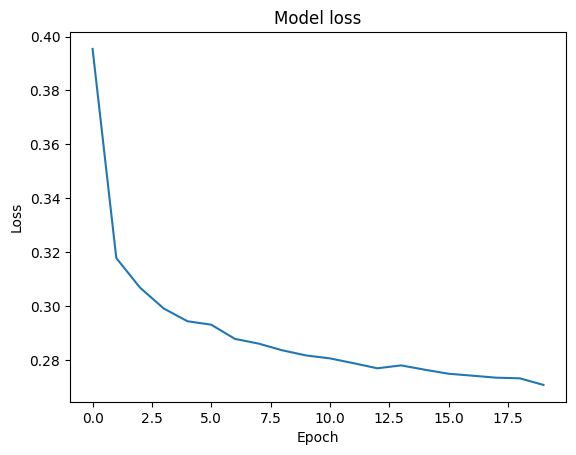

In [81]:
def plot_history(history):
    plt.plot(history.history['loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

plot_history(history)

In [82]:
results = model.evaluate(X_val, y_val, verbose=0)
print(results[1])

0.913095235824585


In [83]:
def plot_loss_accuracy(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()

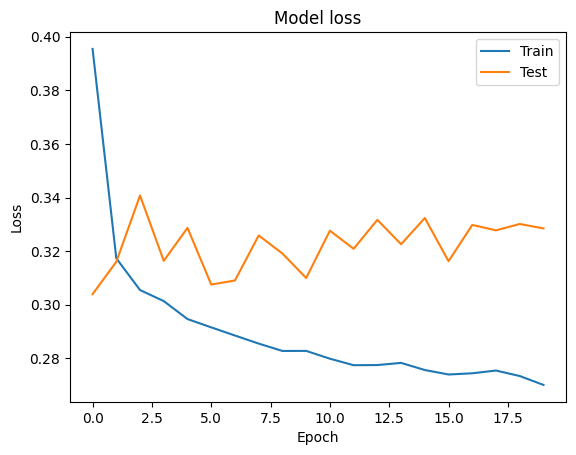

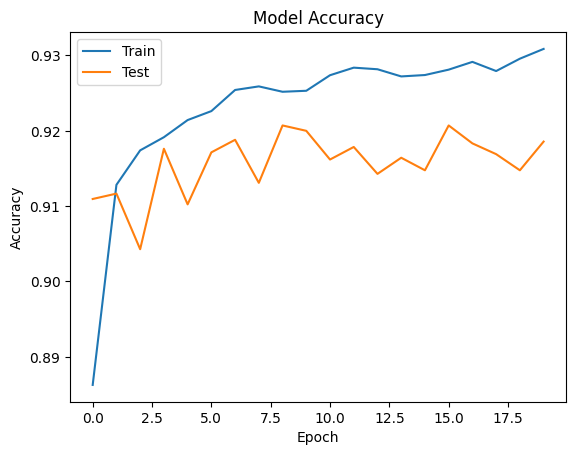

In [89]:
plot_loss_accuracy(history)

## New model

In [90]:
model = Sequential()
model.add(layers.Dense(64, input_shape=(28,28,1), activation='relu'))
model.add(layers.Dense(64, activation='tanh'))
model.add(layers.Dense(10, activation='softmax'))

In [91]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 28, 28, 64)        128       
                                                                 
 dense_8 (Dense)             (None, 28, 28, 64)        4160      
                                                                 
 dense_9 (Dense)             (None, 28, 28, 10)        650       
                                                                 
Total params: 4,938
Trainable params: 4,938
Non-trainable params: 0
_________________________________________________________________


In [96]:
X_train.shape

(37800, 28, 28, 1)

In [94]:
model.compile(loss='mse', 
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train,
                   y_train,
                   validation_data=(X_val, y_val),
                   batch_size=64,
                   epochs=20)

Epoch 1/20


ValueError: in user code:

    File "/home/eduardo/.pyenv/versions/3.10.6/envs/inegi/lib/python3.10/site-packages/keras/engine/training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "/home/eduardo/.pyenv/versions/3.10.6/envs/inegi/lib/python3.10/site-packages/keras/engine/training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/eduardo/.pyenv/versions/3.10.6/envs/inegi/lib/python3.10/site-packages/keras/engine/training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "/home/eduardo/.pyenv/versions/3.10.6/envs/inegi/lib/python3.10/site-packages/keras/engine/training.py", line 998, in train_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "/home/eduardo/.pyenv/versions/3.10.6/envs/inegi/lib/python3.10/site-packages/keras/engine/training.py", line 1092, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "/home/eduardo/.pyenv/versions/3.10.6/envs/inegi/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 605, in update_state
        metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "/home/eduardo/.pyenv/versions/3.10.6/envs/inegi/lib/python3.10/site-packages/keras/utils/metrics_utils.py", line 77, in decorated
        update_op = update_state_fn(*args, **kwargs)
    File "/home/eduardo/.pyenv/versions/3.10.6/envs/inegi/lib/python3.10/site-packages/keras/metrics/base_metric.py", line 143, in update_state_fn
        return ag_update_state(*args, **kwargs)
    File "/home/eduardo/.pyenv/versions/3.10.6/envs/inegi/lib/python3.10/site-packages/keras/metrics/base_metric.py", line 700, in update_state  **
        matches = ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/eduardo/.pyenv/versions/3.10.6/envs/inegi/lib/python3.10/site-packages/keras/metrics/metrics.py", line 3669, in sparse_categorical_accuracy
        matches = metrics_utils.sparse_categorical_matches(y_true, y_pred)
    File "/home/eduardo/.pyenv/versions/3.10.6/envs/inegi/lib/python3.10/site-packages/keras/utils/metrics_utils.py", line 970, in sparse_categorical_matches
        matches = tf.cast(tf.equal(y_true, y_pred), backend.floatx())

    ValueError: Dimensions must be equal, but are 10 and 28 for '{{node Equal}} = Equal[T=DT_FLOAT, incompatible_shape_error=true](IteratorGetNext:1, Cast_1)' with input shapes: [?,10], [?,28,28].
